Importarea modulelor care ne ajuta la analizarea setului de date + la vizualizarea lui

In [35]:
#importarea modulelor care ne ajuta la analizarea setului de date
import numpy as np
import pandas as pd

#importarea modulelor care ne ajuta la vizualizarea setului de date
import matplotlib.pyplot as plt
import seaborn as sns



<h1>Vizualizarea setului de date </h1>

In [36]:
df = pd.read_csv('Student_Marks.csv')

In [37]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [38]:
df.info

<bound method DataFrame.info of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [39]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [40]:
df.shape

(100, 3)

In [41]:
nan_rows = df.isna().any(axis = 1)
for i in range(100):
    if nan_rows[i] == 'True':
        print('Exista elemente lipsa')
print('Nu exista elemente lipsa')

Nu exista elemente lipsa


In [42]:
df.isnull().value_counts()

number_courses  time_study  Marks
False           False       False    100
Name: count, dtype: int64

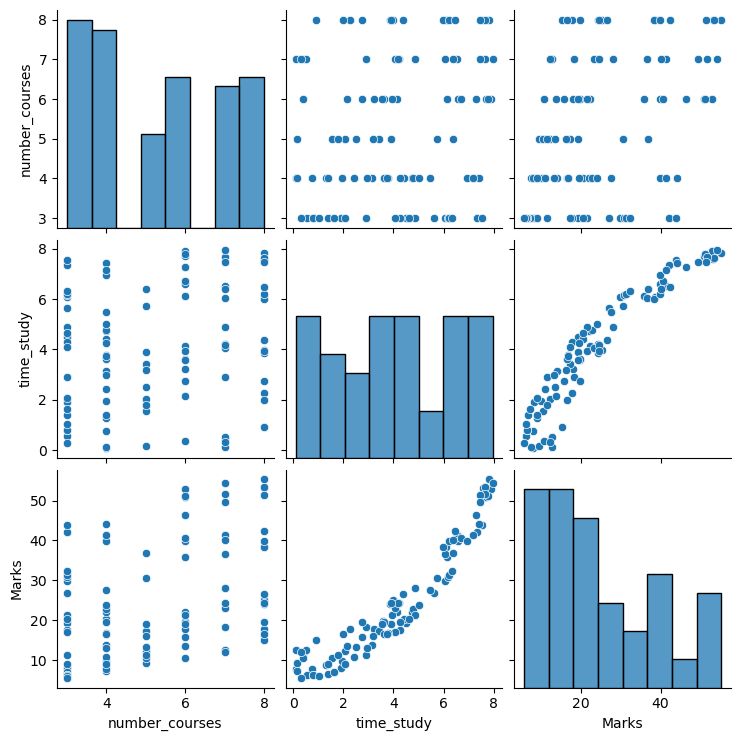

In [43]:
sns.pairplot(df)

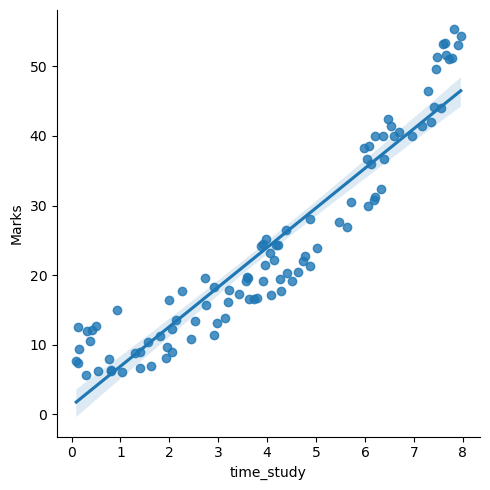

In [44]:
sns.lmplot(x = 'time_study', y = 'Marks', data = df)

Splituirea setului de date

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X = df[['number_courses', 'time_study']]
y = df['Marks']

In [19]:
#y = np.array(y).reshape(-1, 1)


In [47]:
y.shape

(100,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)

(50, 2)
(50, 2)


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
w = lm.coef_
b = lm.intercept_
print(f'w = {w}')
print(f'b = {b}')


w = [1.85572127 5.34347137]
b = -7.190683499583415


In [64]:
predictii = lm.predict(X_test)

Text(0.5, 0, 'Actual marks')

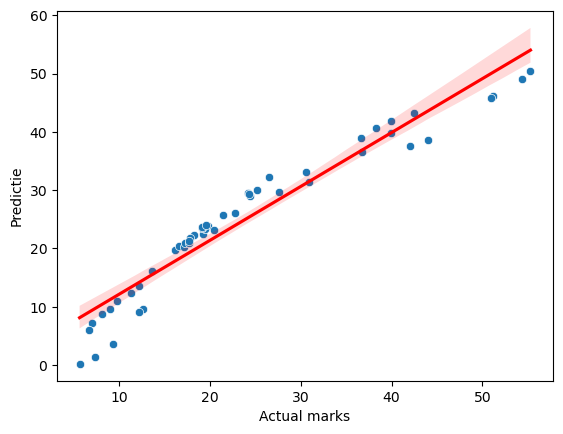

In [70]:
sns.scatterplot(x = y_test, y = predictii)
sns.regplot(x = y_test, y = predictii, scatter=False, color = 'red')
plt.ylabel("Predictie")
plt.xlabel("Actual marks")

In [71]:
for actual, predicted in zip(y_test, predictii):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 16.106, Predicted: 19.70956023802242
Actual: 36.653, Predicted: 38.9846532314482
Actual: 16.606, Predicted: 20.497836604819742
Actual: 8.924, Predicted: 9.539155302501744
Actual: 9.742, Predicted: 11.042968236995215
Actual: 51.142, Predicted: 46.0708694145237
Actual: 12.209, Predicted: 13.629156674876008
Actual: 54.321, Predicted: 49.108047645482536
Actual: 42.036, Predicted: 37.61724924331397
Actual: 19.202, Predicted: 22.522355580878074
Actual: 50.986, Predicted: 45.731300629147285
Actual: 24.172, Predicted: 29.463092165751227
Actual: 7.014, Predicted: 7.24706600121095
Actual: 39.965, Predicted: 39.80476417187456
Actual: 24.394, Predicted: 29.078795070545624
Actual: 55.299, Predicted: 50.40493585138726
Actual: 36.746, Predicted: 36.592495785956
Actual: 38.278, Predicted: 40.716613943616444
Actual: 24.318, Predicted: 29.26980251231985
Actual: 8.1, Predicted: 8.806960109033852
Actual: 18.238, Predicted: 22.34578274800391
Actual: 11.253, Predicted: 12.313327631542403
Actual: 12.

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
print(f'Mean Absolute error: {mean_absolute_error(y_test, predictii)}')
print(f'Mean Squared error: {mean_squared_error(y_test, predictii)}')
print(f'Root Mean Squared error: {math.sqrt(mean_squared_error(y_test, predictii))}')